In [1]:
import torch
import numpy as np

In [2]:
#To enable dataset run this script
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent','Mozilla/5.0')]
urllib.request.install_opener(opener)

In [3]:
from torchvision import datasets
import torchvision.transforms as transforms

num_workers=0
batch_size = 20
transform = transforms.ToTensor()
train_data = datasets.MNIST(root = 'data', train = True, download= True, transform =transform)
test_data = datasets.MNIST(root= 'data', train = False, download = True, transform = transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers= num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size= batch_size, num_workers=num_workers)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


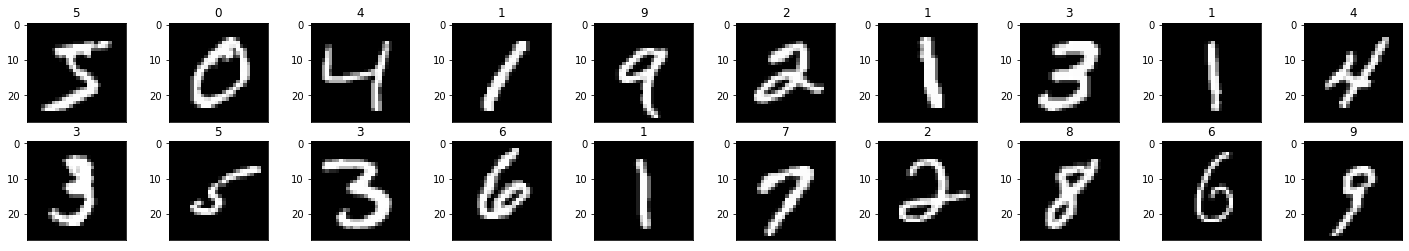

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
images, labels = iter(train_loader).next()
images = images.numpy()


fig = plt.figure(figsize = (25,4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1,xticks=[] )
  ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
  ax.set_title(labels[idx].item())

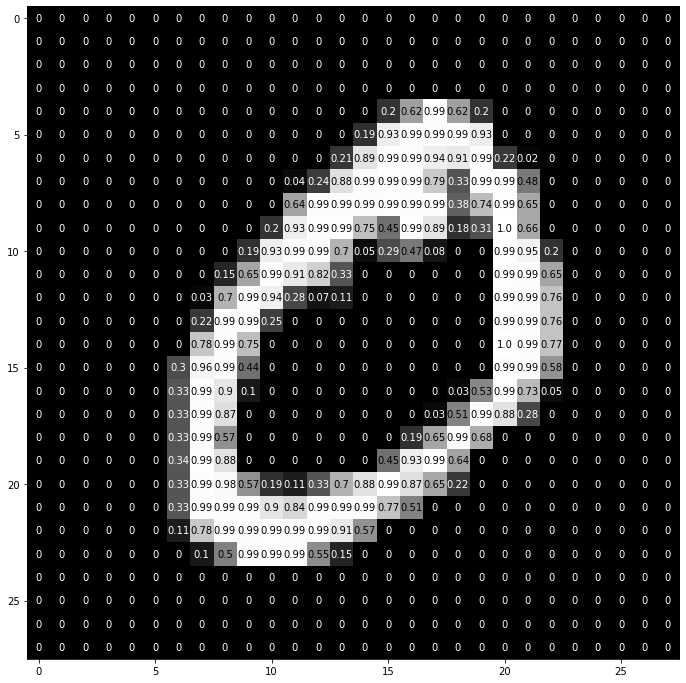

In [5]:
img = np.squeeze(images[1])
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()
ax.imshow(img, cmap = 'gray')
width, height = img.shape
thresh = img.max()/2.5

for x in range(width):
  for y in range(height):
    val = round(img[x][y],2) if img[x][y] !=0 else 0
    ax.annotate(str(val), xy=(y,x), horizontalalignment='center', verticalalignment ='center',
                color = 'white' if img[x][y]<thresh else 'black')
  

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, 512)
    self.fc2 = nn.Linear(512,512)
    self.fc3 = nn.Linear(512,10)
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = self.fc3(x)
    return x

model = Net()
print(model)   


Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [8]:
n_epochs = 50
model.train()

for epoch in range(n_epochs):
  train_loss=0.0
  for data, target in train_loader:
    optimizer.zero_grad() #clear the optimized variable
    output = model(data)
    loss = criterion(output,target)
    loss.backward()
    optimizer.step() #Perform single optimization step
    train_loss += loss.item()*data.size(0)

  train_loss = train_loss/len(train_loader.dataset)
  print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))



Epoch: 1 	Training Loss: 0.817877
Epoch: 2 	Training Loss: 0.323754
Epoch: 3 	Training Loss: 0.251404
Epoch: 4 	Training Loss: 0.204231
Epoch: 5 	Training Loss: 0.172150
Epoch: 6 	Training Loss: 0.150838
Epoch: 7 	Training Loss: 0.132779
Epoch: 8 	Training Loss: 0.116647
Epoch: 9 	Training Loss: 0.107052
Epoch: 10 	Training Loss: 0.096671
Epoch: 11 	Training Loss: 0.089704
Epoch: 12 	Training Loss: 0.080903
Epoch: 13 	Training Loss: 0.076534
Epoch: 14 	Training Loss: 0.070096
Epoch: 15 	Training Loss: 0.065518
Epoch: 16 	Training Loss: 0.061107
Epoch: 17 	Training Loss: 0.056596
Epoch: 18 	Training Loss: 0.052870
Epoch: 19 	Training Loss: 0.050191
Epoch: 20 	Training Loss: 0.047436
Epoch: 21 	Training Loss: 0.044388
Epoch: 22 	Training Loss: 0.041388
Epoch: 23 	Training Loss: 0.038685
Epoch: 24 	Training Loss: 0.037681
Epoch: 25 	Training Loss: 0.035642
Epoch: 26 	Training Loss: 0.033060
Epoch: 27 	Training Loss: 0.031512
Epoch: 28 	Training Loss: 0.030534
Epoch: 29 	Training Loss: 0.0

Test the Trained network

In [9]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data, target in test_loader:
  output = model(data)
  loss = criterion(output, target)
  test_loss += loss.item()*data.size(0)
  _, pred = torch.max(output,1) #output probabilities into predcited class
  correct = np.squeeze(pred.eq(target.data.view_as(pred))) #comparre predictions with true label
  
  #test accuracy for each object class
  for i in range(batch_size):
    label = target.data[i]
    class_correct[label] += correct[i].item()
    class_total[label] += 1
  
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
  if class_total[i]>0:
    print('Test Accuracy of 5%s: %2d%% (%2d/%2d)'% 
          (
              str(i),100*class_correct[i]/class_total[i], 
              np.sum(class_correct[i]), np.sum(class_total[i])
          ))
  else:
    print('Test Accuracy of %5s: N/A (no training examples)'% (classes[i]))

print('\n Test Accuracy (Overall): %2d%% (%2d/%2d)' % 
      (100.* np.sum(class_correct)/np.sum(class_total),
       np.sum(class_correct), np.sum(class_total)))



Test Loss: 0.056891

Test Accuracy of 50: 99% (974/980)
Test Accuracy of 51: 99% (1126/1135)
Test Accuracy of 52: 98% (1014/1032)
Test Accuracy of 53: 98% (993/1010)
Test Accuracy of 54: 98% (970/982)
Test Accuracy of 55: 98% (878/892)
Test Accuracy of 56: 98% (940/958)
Test Accuracy of 57: 97% (1007/1028)
Test Accuracy of 58: 97% (947/974)
Test Accuracy of 59: 97% (984/1009)

 Test Accuracy (Overall): 98% (9833/10000)


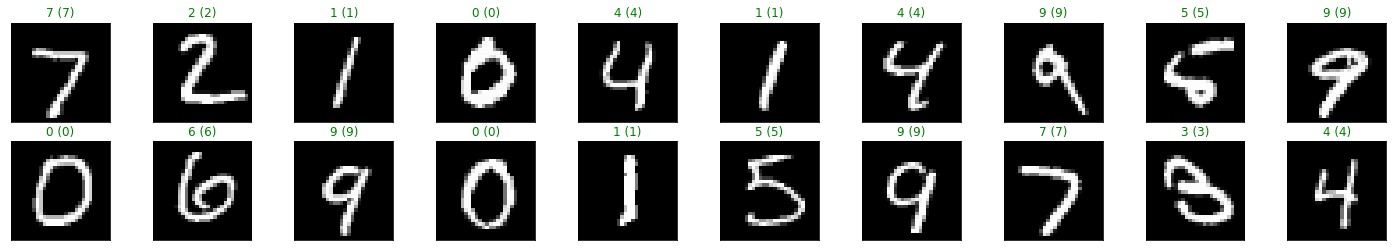

In [10]:
#Visualize sample test results
images, labels = iter(test_loader).next()

output = model(images)
_, preds = torch.max(output, 1)
images = images.numpy()

fig = plt.figure(figsize = (25,4))
for idx in np.arange(20):
  ax= fig.add_subplot(2,10, idx+1, xticks=[],yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
  ax.set_title("{} ({})".format(str(preds[idx].item()),
                               str(labels[idx].item())),
               color=("green" if preds[idx]==labels[idx] else "red"))
